# Проект - "Исследование объявлений о продаже квартир".

## 1 Описание проекта.

**Общая информация о заказчике и данных:** 
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель проекта:** Научиться определять рыночную стоимость объектов недвижимости.

**Задания:**
- установить параметры, это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


**План проекта:**
1. Описание проекта. 
2. Загрузка данных и изучение общей информации.
3. Предобработка данных.
4. Исследование данных.
5. Общий вывод.

## 2. Загрузка данных и изучение общей информации.

In [1]:
# импортируем необходимые библиотеки 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

# отключаем предупреждения

warnings.filterwarnings('ignore') 

### 2.2 Изучим общую информацию о полученном датафрейме

In [2]:
data = pd.read_csv('C:/Users/Ильдар/Desktop/Проекты в юпитере/для публикации/2. Исследование объявлений о продаже квартир/real_estate_data.csv', sep='\t') # Прочитаем csv-файл 
data.head() # Выведем его первые пять строк. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Перед нами таблица содержащая данные о посещениях сайта, всего 22 столбцов:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `balcony` — число балконов;
- `ceiling_height` — высота потолков (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
- `first_day_exposition` — дата публикации;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь в квадратных метрах (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around3000` — число парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — число комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `total_images` — число фотографий квартиры в объявлении.

Все названия в нижнем змеином регистре, нет необходимости делать изменения. 

In [3]:
data.info() # Выведем основную информацию о датафрейме с помощью метода info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- В столбцах `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` тип данных парметров должны быть целые числа, нужно изменить в них тип данных. 
- Столбец с датой - `days_exposition` нужно перевести в тип - **datetime**.
- Cтолбец last_price, он имеет дробный тип данных. Думаю, что никто не продаёт недвижку с копейками, лучше округлить. 

### 2.3 Построем общую гистограмму для всех столбцов таблицы.

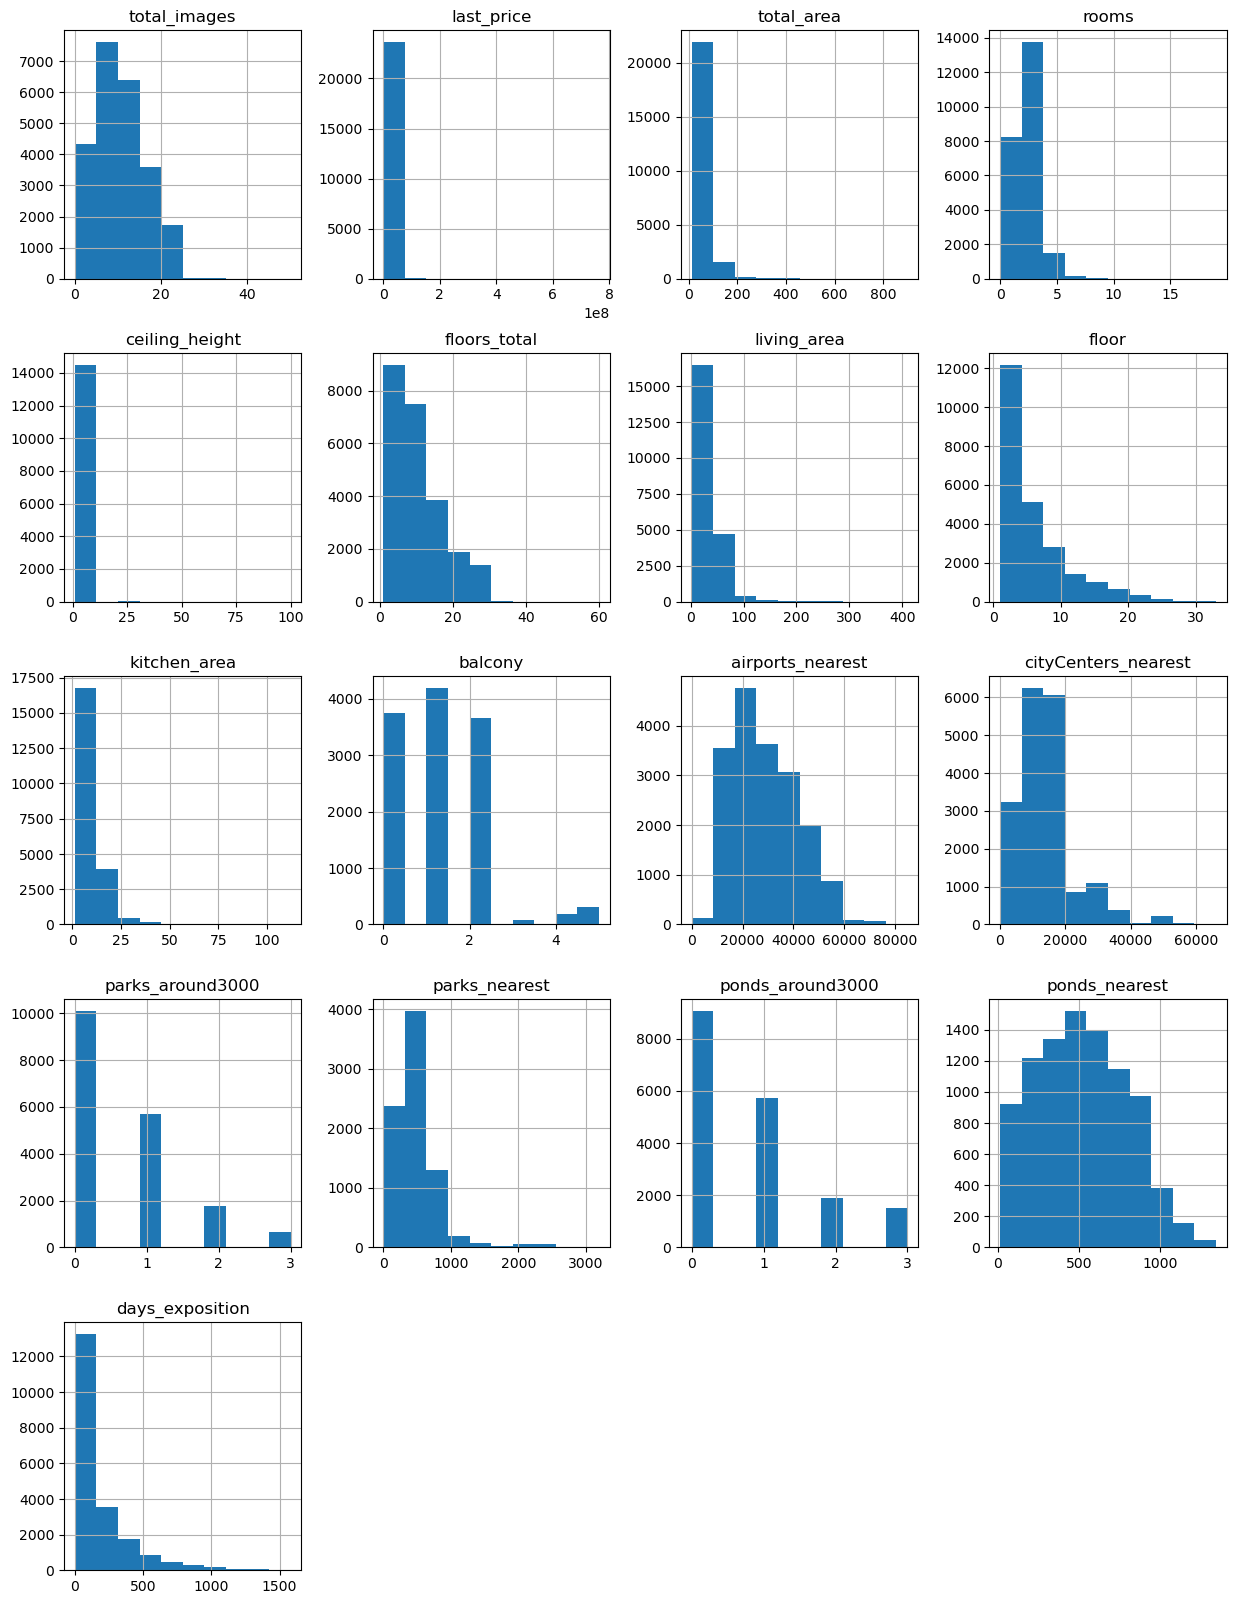

In [4]:
data.hist(figsize=(15, 20));

В основном Гистограммы похожи на графики нормального распределения, но на некоторых пик приходится к знаечению близкому к нулю. 

### 2.4 Найдем пропущенные значения в столбцах и дубликаты.

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm') # Найдем колличество пропусков в % 

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Есть пропуски в столбцах: 
- `ceiling_height` — высота потолков (м);
- `living_area` — жилая площадь в квадратных метрах (м²);
- `is_apartment` — апартаменты (булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `balcony` — число балконов;
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `cityCenters_nearest` — расстояние до центра города (м);
- `ponds_around3000` — число водоёмов в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

Предлагаю, если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время.

In [6]:
# Проверим данные на явные дубликаты: Посчитаем колличество дубликатов в таблице

data.duplicated().sum()

0

**Вывод:**
- Загрузили таблицу содержащая данные о посещениях сайта, всего 23 699 строк и 22 столбцов. 
- В некоторых столбцах (количество балконов, парков, озер, дней) тип данных парметров должны быть целые числа, нужно изменить в них тип данных. 
- Столбец с датой - `days_exposition` нужно перевести в тип - **datetime**. 
- В основном Гистограммы похожи на графики нормального распределения, но на некоторых пик приходится к знаечению близкому к нулю.
- В некоторых столбцах есть пропуски.
- Дубликатов в таблице нет. 

## 3 Предобработка данных

### 3.1 Удалим пропуски.

В столбцах `living_area` и `kitchen_area` пропуски менее 11%, поэтому удалим их. 

In [7]:
data = data.dropna(subset=['living_area', 'kitchen_area']) # удаляем пропуски 

### 3.2 Заполним пропущенные значения. 

Предположим, что если продавец не указал число балконов, то скорее всего в его квартире их нет. Такие пропуски правильно заменить на 0. Аналогично со стобцами: `parks_around3000` — число парков в радиусе 3 км, `ponds_around3000` — число водоёмов в радиусе 3 км, соответственно значения стобцов `parks_nearest` — расстояние до ближайшего парка (м), `ponds_nearest` — расстояние до ближайшего водоёма (м) тоже будет ноль.

In [8]:
# В столбцах balcony, parks_around3000, ponds_around3000, parks_nearest, ponds_nearest заменим все NaN на 0

columns_change = ['balcony','parks_around3000','ponds_around3000', 'parks_nearest', 'ponds_nearest']
for column in columns_change:
    data[column] = data[column].fillna(0) 

В столбцах `is_apartment` — апартаменты (булев тип) предположим что вместо пропусков должно быть отрицание - **True**.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(True) # В столбце is_apartment заменим NaN на Trye 

Некоторые столбцы можно поменять на значения, относительно своего района.

In [10]:
# Поменяем значания пропусков для столбца высота потолков, отностиельно соответствуюших районов

for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
# Все что, не заполнилось - заполняем общей медианой по Лен. области (121 пропуск заменим медианой) 
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [11]:
# Заполним пропуски в расстоянии до центра в зависимости от населенного пункта.
# Если останутся пропуски, то будет некорректор до-заполнять медианой. 

for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name,'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median

Логичную замену столбцам `locality_name` — название населённого пункта, `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м), `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)   предложить невозможно - оставим эти значения пустыми. 

Причины, которые могли привести к пропускам в данных: продовец забыл указать (пропустил) значения, или указывает некорректные данные. Либо как в случае с балконом не стал указывает отсутствуе ближайщего парка, водоема (цифру Ноль). 

### 3.3 Типы данных.

In [12]:
# В столбцах balcony, parks_around3000, ponds_around3000 преоразуем тип данных

columns_change_type = ['balcony', 'parks_around3000', 'ponds_around3000']
 
for column in columns_change_type:
    data[column] = data[column].astype('Int64')

In [13]:
# Преоразуем тип данных для столбца days_exposition

data['days_exposition'] = data['days_exposition'].fillna(-1)
data['days_exposition'] = data['days_exposition'].astype(int)
data['days_exposition'] = data['days_exposition'].replace('-1', np.nan)

In [14]:
# Изменим тип данных для столбца first_day_exposition

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S') 

In [15]:
# Округлим значения до целых для столбца last_price 

data['last_price'] = data['last_price'].round()

### 3.4 Заменим названия неявных дубликатов.

В столбце с названиями устраним неявные дубликаты: «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов.

In [16]:
# заменим названия в существующем столбце

data = data.apply(lambda x: x.replace({'поселок':'посёлок',\
                                       'городской посёлок': 'посёлок',\
                                       'посёлок городского типа': 'посёлок',\
                                       'коттеджный посёлок': 'посёлок',\
                                       'посёлок при железнодорожной станции': 'посёлок'}, regex=True))

In [17]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество',
                                                                        'садовое товарищество', regex=True)

### 3.5 Найдем редкие и выбивающиеся значения показателей, где они могут быть вероятнее всего, с помощью метода describe().

In [18]:
data['last_price'].describe() # для показателя цены на момент снятия с публикации

count    2.098200e+04
mean     6.506827e+06
std      9.592656e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

In [19]:
data['total_area'].describe() # для общей площади квартиры 

count    20982.000000
mean        60.547304
std         34.497775
min         14.000000
25%         40.500000
50%         52.205000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [20]:
data['ceiling_height'].describe() # для высоты потолков

count    20982.000000
mean         2.733497
std          1.043826
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [21]:
data['floors_total'].describe() # для всего этажей в доме

count    20943.000000
mean        10.558516
std          6.520378
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

In [22]:
data['rooms'].describe() # для количества комнат

count    20982.000000
mean         2.096035
std          1.064559
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

- В столбце `last_price` ничего выбивающегося не заметно. 
- Для столбцах `total_area` и `ceiling_height` смущает максимальные показатели 900 м² и 100 м.  
- В столбце `floors_total` максимальное значение 60 этажей, но учитывая что в Москве есть башни "Imreria Tower" (60 этажей) и "Меркурий Сити Тауер" (75 этажей), можно предположить что данные верны.
- Для столбца `rooms` ничего выбивающегося не заметно.

Попробуем обработать аномалии в столбцах или удалить выбивающиеся значения.

In [23]:
data.query('total_area == 900') # Найдем из таблицы стороку с максимальной площадью 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,True,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,0.0,2,318.0,106


Квартира с максимальной площадью имеет 12 комнат, поэтому можем предположить что показатель площади укзан верно и оставить стороку без изменений. 

Поделим выбивающиеся значения более 20 м на 10 и добавим их в новый столбей `ceiling_height_corr`

In [24]:
data['ceiling_height_corr'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10 

### 3.6 Добавим новые столбцы.

Добавим в таблицу новые столбцы со следующими параметрами: 
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [25]:
data['price_square_meter'] = data['last_price'] / data['total_area'] # Найдем цену одного квадратного метра.

In [26]:
data['first_day_weekday'] = data['first_day_exposition'].dt.weekday # Найдем день недели публикации объявления

In [27]:
data['first_day_month'] = data['first_day_exposition'].dt.month # Найдем месяц публикации объявления

In [28]:
data['first_day_month_year'] = data['first_day_exposition'].astype('datetime64[M]') # Найдем месяц публикации по годам

In [29]:
data['first_day_year'] = data['first_day_exposition'].dt.year # Найдем год публикации объявления

In [30]:
# распределим в новым столбце тип этажа квартиры (значения — «первый», «последний», «другой») через функцию

def floor_name(df):
    if df.floor == 1:
        return 'первый'
    elif df.floor == df.floors_total:
        return 'последний'
    else:
        return 'другой'
 
data['floor_name'] = data.apply(floor_name, axis=1) 

In [31]:
# найдем расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)

data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

**Вывод:**
- В столбцах `balcony`, `parks_around3000`, `ponds_around3000`, `parks_nearest`, `ponds_nearest` заменили все пропуски на 0. 
- Поменяли значания пропусков для столбца `ceiling_height` - высота потолков и `cityCenters_nearest` - расстояние до центра, на медианные значения отностиельно соответствуюших районов.
- Явных дубликотова в таблице не обнаружено.
- Привели названия населенных пунктов содержащие такие слова как - посёлок, городского типа, поселок станции, городской в единый формат - поселок.
- Выбивающиеся значения потолков более 20 м разделили на 10 и добавили значения в новый столбей `ceiling_height_corr`.
- Добавили новые столбцы. 

## 4 Исследовательский анализ данных.

### 4.1 Изучим параметры объектов и построем отдельные гистограммы для каждого из них.
Изучим следующие параметры объектов:
- общая площадь;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме.

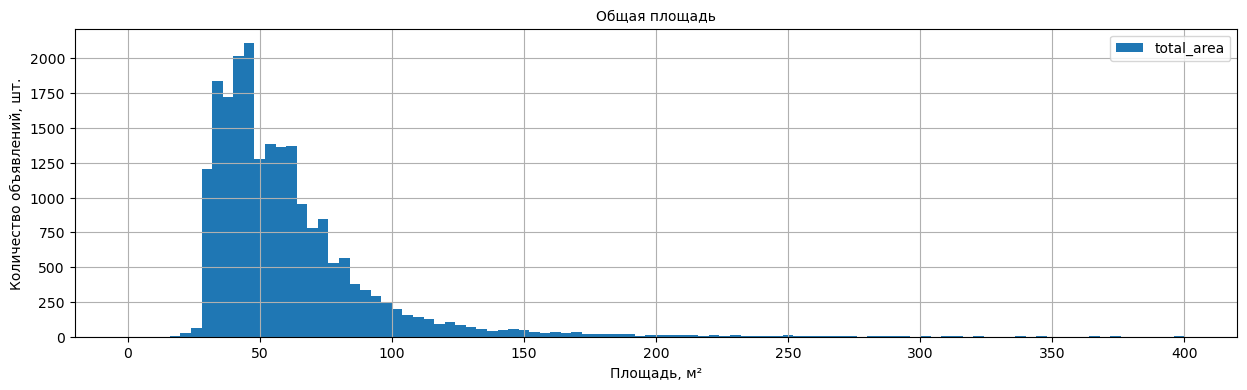

count    20982.000000
mean        60.547304
std         34.497775
min         14.000000
25%         40.500000
50%         52.205000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [32]:
# гистограмма для общей площади

data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,400))
plt.title('Общая площадь', size=10)
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений, шт.')
plt.show()

data['total_area'].describe() # получим основные характеристики данных в столбце

Данные выглядят адекватно, так как нет нулевых значений в площадях квартир. Среднее значение составляет 60 м², при этом у квартир с площадью примерно 45 м² наибольшее количество предложений на сервисе, свыше 2 000, если сравнивать с другими. Есть еще максимальное в 900 м², которое сильно выбивается, но не влияет на общую картину. Это либо соединенная элитная квартира из нескольких этажей, либо ошибка в данных.

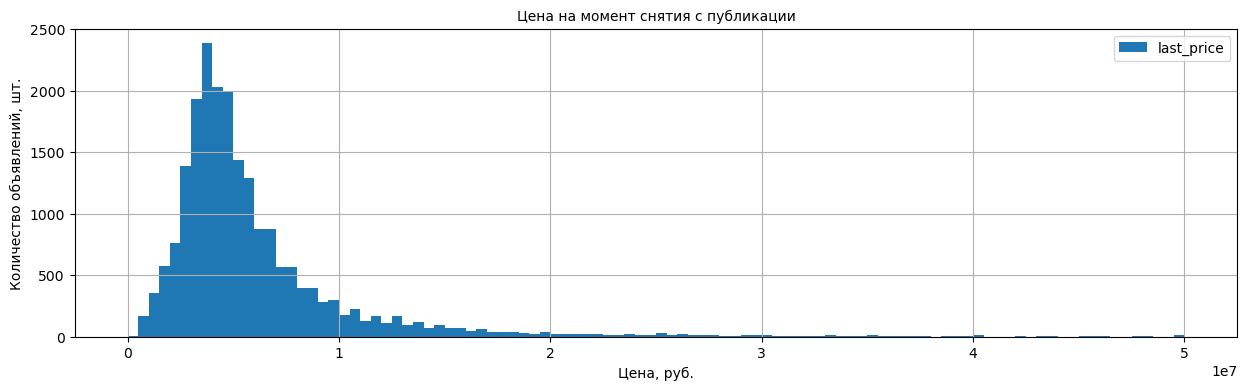

count    2.098200e+04
mean     6.506827e+06
std      9.592656e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

In [33]:
# гистограмма для цены на момент снятия с публикации

data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,50000000))
plt.title('Цена на момент снятия с публикации', size=10)
plt.xlabel('Цена, руб.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

data['last_price'].describe() # получим основные характеристики данных в столбце

Если смотреть на гистограмму, то в целом все в порядке Есть выбивающиеся значения, но их меньшинство. например, квартира стоимостью 12 190 рублей, что нереально. При том, что действительно бывают очень дорогующие шикарные квартиры и в эту сторону это работает немного по другому. Среднее значение стоимости квартир 6 506 827 рублей, что выглядит реально.

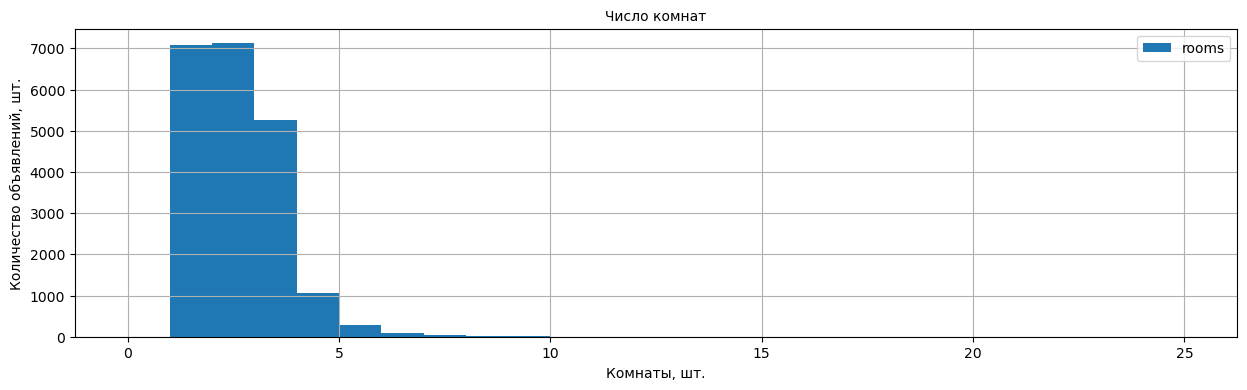

count    20982.000000
mean         2.096035
std          1.064559
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [34]:
# гистограмма для числа комнат

data.plot(y = 'rooms', kind = 'hist', bins = 25, grid=True, figsize = (15,4), range = (0,25))
plt.title('Число комнат', size=10)
plt.xlabel('Комнаты, шт.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

data['rooms'].describe() # получим основные характеристики данных в столбце

Как мы узнали из предыдущих гистаграмм, возможно есть элитные квартиры, либо ошибка в данных, поэтому 8 комнат вполне возможно, но 19 комнат выглядит странно, это уже выбивающееся значение. Среднее количество комнат - 2 из общего числа объявлений, здесь все в порядке.

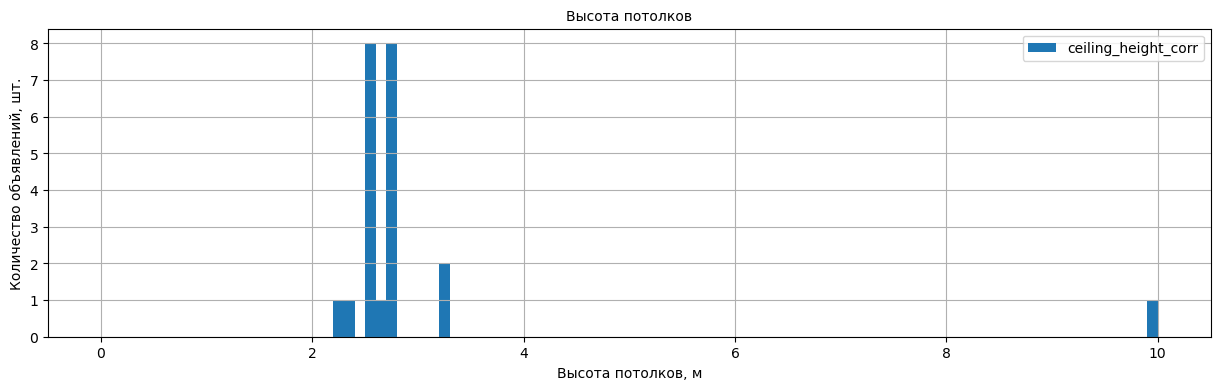

count    22.000000
mean      2.968636
std       1.585927
min       2.260000
25%       2.500000
50%       2.650000
75%       2.700000
max      10.000000
Name: ceiling_height_corr, dtype: float64

In [35]:
# гистограмма для высоты потолков после предобработки 

data.plot(y = 'ceiling_height_corr', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,10))
plt.title('Высота потолков', size=10)
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений, шт.')
plt.show()

data['ceiling_height_corr'].describe() # получим основные характеристики данных в столбце

Здесь тоже в целом все в порядке. Средняя высота потолка - 2,9 метра. Минимальная высота потолка 2,2 метр и максимальная высота - 10 метров.

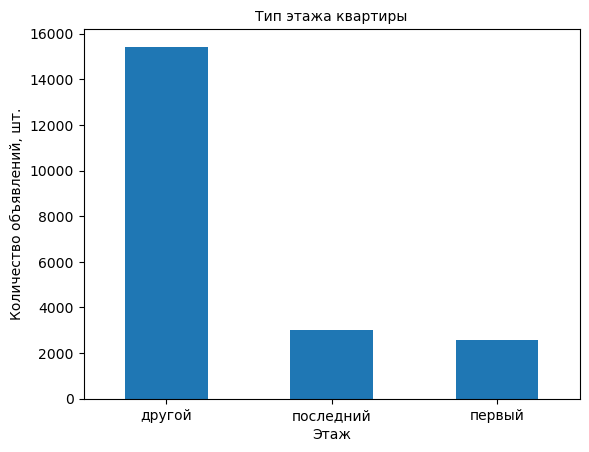

count      20982
unique         3
top       другой
freq       15427
Name: floor_name, dtype: object

In [36]:
# столбчатая диограмма для столбца тип этажа квартиры

data['floor_name'].value_counts().plot(kind='bar', rot=0)
plt.title('Тип этажа квартиры', size=10)
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений, шт.')
plt.show()

data['floor_name'].describe() # получим основные характеристики данных в столбце

Полученные данные соответствуют реалиям - меньеше всего предложений на первом этаже, затем с небольшим отрывом посдедний этаж. Остальные этажи заметно больше представлены. 

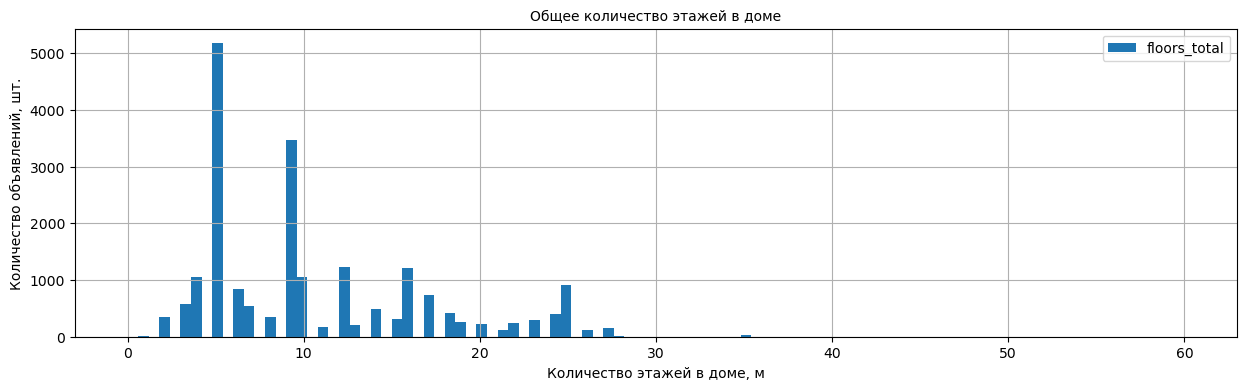

count    20943.000000
mean        10.558516
std          6.520378
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

In [37]:
# гистограмма для столбца общее количество этажей в доме

data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,60))
plt.title('Общее количество этажей в доме', size=10)
plt.xlabel('Количество этажей в доме, м')
plt.ylabel('Количество объявлений, шт.')
plt.show()

data['floors_total'].describe() # получим основные характеристики данных в столбце

В целом все в порядке, среднее количество - 10,55. Минамальное количество этажей - 1. Максимальное - 60. 

### 4.2 Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Построем гистограмму, укажем range до 200 (ведь именно в эти дни происходят основные продажи) и колличество корзин = колличеству дней (в соответствии с range).
- Посчитаем среднее и медиану.

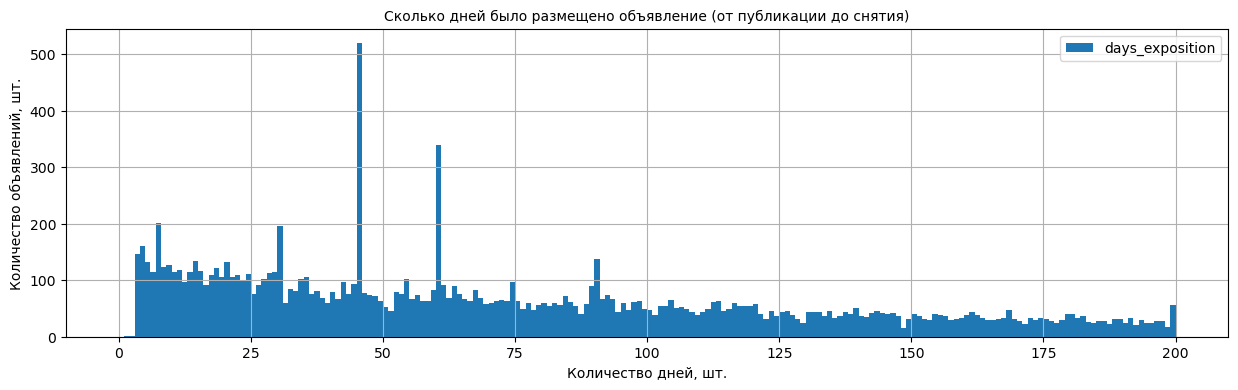

count    20982.000000
mean       159.945525
std        215.917870
min         -1.000000
25%         21.000000
50%         79.000000
75%        205.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [38]:
# гистограмма для столбца общее количество этажей в доме

data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid=True, figsize = (15,4), range = (0, 200))
plt.title('Сколько дней было размещено объявление (от публикации до снятия)', size=10)
plt.xlabel('Количество дней, шт.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

data['days_exposition'].describe() # получим основные характеристики данных в столбце

Как видим в районе 45 и 60 дней есть выбросы, эти аномалии очень похожи на техническую особенность самой платформы: вероятнее, в эти дни платформа автоматически убирает объявления, если пользователь его не продлил. Минимальное значение - 1 тоже говорит об ошибке в данных. 

### 4.3 Посмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта. 
Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построем графики, которые покажут зависимость цены от указанных выше параметров.

0.30166534066581513

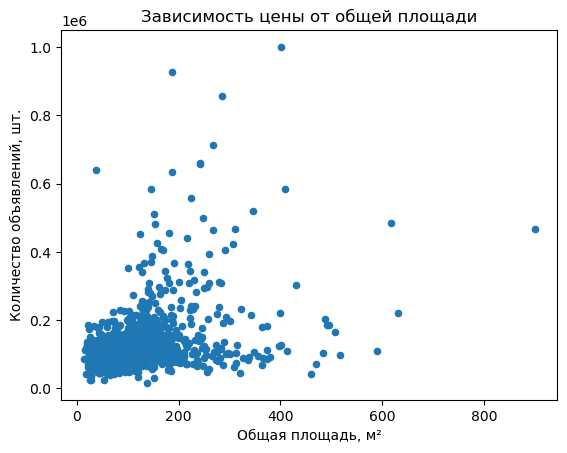

In [39]:
# Цена 1 квадратного метра в зависиомти от общей площади: 

data_pivot = data.pivot_table(index='total_area', values='price_square_meter').reset_index()
data_pivot.plot(
    kind='scatter',
    x='total_area',
    y='price_square_meter', 
    title='Зависимость цены от общей площади',
    xlabel='Общая площадь, м²',
    ylabel='Количество объявлений, шт.',
    rot=0
)

data['total_area'].corr(data['price_square_meter'])

Значение коэффициент корреляции Пирсона в зависимости Цена 1 квадратного метра  от общей площади близко к нулю, значит - линейная связь слабая, но она положитльная (**чем больше общая площадь, тем дороже квадратный метр**). 

0.21551579805107274

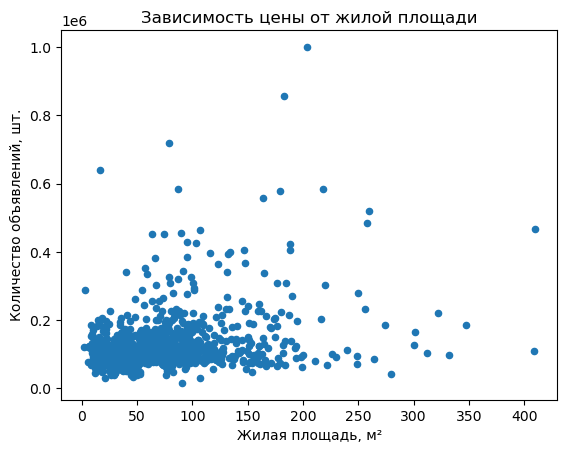

In [40]:
# Цена 1 квадратного метра в зависиомти от жилой площади:

data_pivot = data.pivot_table(index='living_area', values='price_square_meter').reset_index()
data_pivot.plot(
    kind='scatter',
    x='living_area',
    y='price_square_meter', 
    title='Зависимость цены от жилой площади',
    xlabel='Жилая площадь, м²',
    ylabel='Количество объявлений, шт.',
    rot=0
)

data['living_area'].corr(data['price_square_meter'])

Значение коэффициент корреляции Пирсона в зависимости Цена 1 квадратного метра от жилой площади близко к нулю, значит - линейная связь слабая, но она положитльная (**чем больше жилая площадь, тем дороже квадратный метр**).

0.3932542867744277

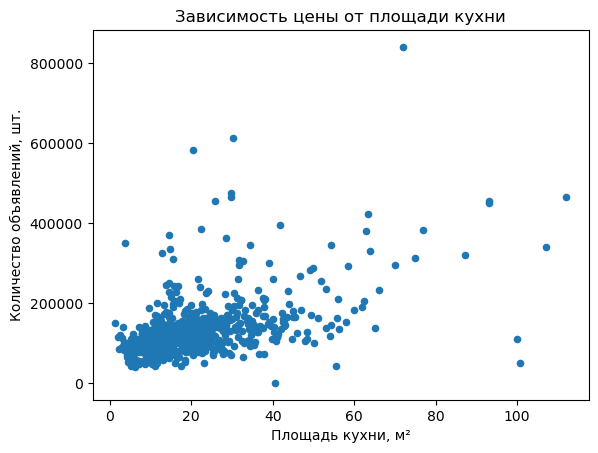

In [41]:
# Цена 1 квадратного метра в зависиомти от площади кухни:

data_pivot = data.pivot_table(index='kitchen_area', values='price_square_meter').reset_index()
data_pivot.plot(
    kind='scatter',
    x='kitchen_area',
    y='price_square_meter', 
    title='Зависимость цены от площади кухни',
    xlabel='Площадь кухни, м²',
    ylabel='Количество объявлений, шт.',
    rot=0
)
data['kitchen_area'].corr(data['price_square_meter'])

Значение коэффициент корреляции Пирсона в зависимости Цена 1 квадратного метра от площади кухни близко к нулю, значит - линейная связь слабая, но она положитльная (**чем больше площадь кухни, тем дороже квадратный метр**).

0.05420896855849847

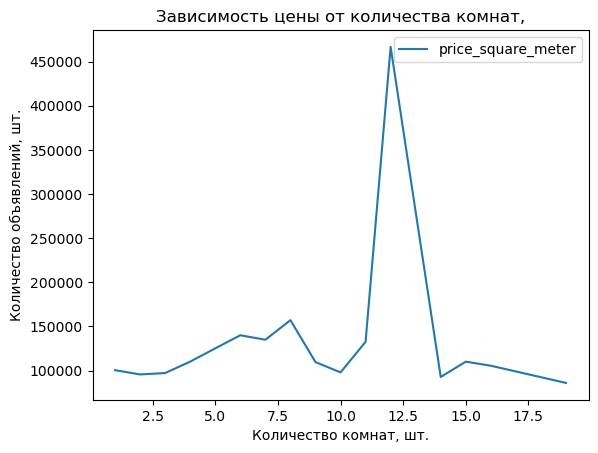

In [42]:
# Цена 1 квадратного метра в зависиомти от количества комнат:

data_pivot = data.pivot_table(index='rooms', values='price_square_meter').reset_index()
data_pivot.plot(
   x='rooms',
   y='price_square_meter',
   title='Зависимость цены от количества комнат,',
   xlabel='Количество комнат, шт.',
   ylabel='Количество объявлений, шт.',
   rot=0
)
data['rooms'].corr(data['price_square_meter'])

Значение коэффициент корреляции Пирсона в зависимости Цена 1 квадратного метра от количества комнат близко к нулю, значит - линейная связь слабая (можно считать, что **количества комнат не влияет на стоимость одного метра**). 

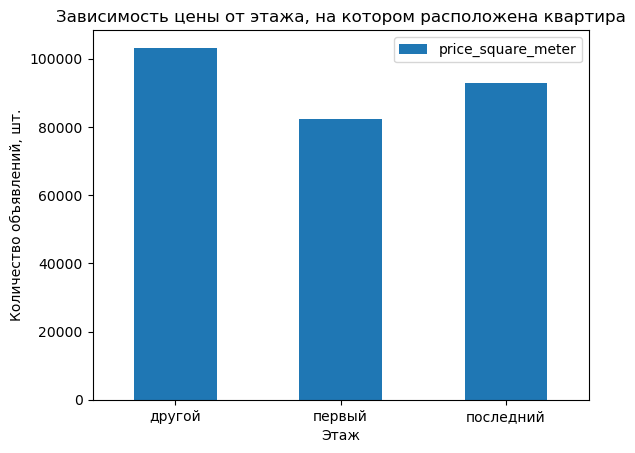

In [43]:
# Цена 1 квадратного метра в зависиомти от этажа, на котором расположена квартира (первый, последний, другой)

data_pivot = data.pivot_table(index='floor_name', values='price_square_meter').reset_index()
data_pivot.plot(
   x='floor_name',
   y='price_square_meter',
   title='Зависимость цены от этажа, на котором расположена квартира',
   kind='bar',
   xlabel='Этаж',
   ylabel='Количество объявлений, шт.',
   rot=0
);

Традиционно, **квартиры на первом и последнем этажах** считаются самыми неудобными для жизни и это **отражается на их стоимости**.

-0.010303650552203482

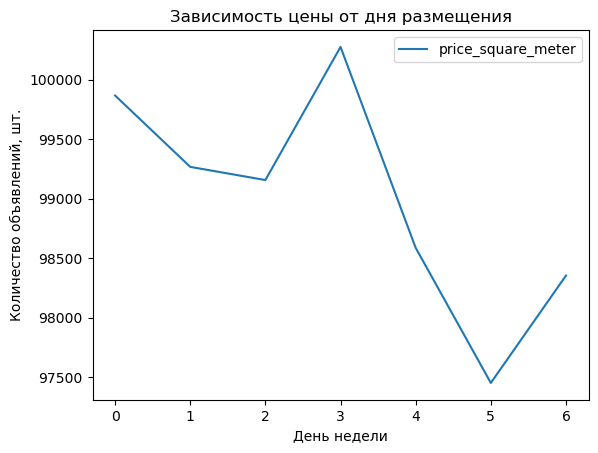

In [44]:
# Цена 1 квадратного метра в зависиомти от дня размещения

data_pivot = data.pivot_table(index='first_day_weekday', values='price_square_meter').reset_index()
data_pivot.plot(
   x='first_day_weekday',
   y='price_square_meter',
   title='Зависимость цены от дня размещения',
   xlabel='День недели',
   ylabel='Количество объявлений, шт.',
   rot=0
)
data['first_day_weekday'].corr(data['price_square_meter'])

Значение коэффициент корреляции Пирсона в зависиомти Цена 1 квадратного метра от от дня размещения близко к нулю, значит - линейная связь слабая (можно считать, что **день размещения не влияет на стоимость одного метра**).

-0.004651646528392657

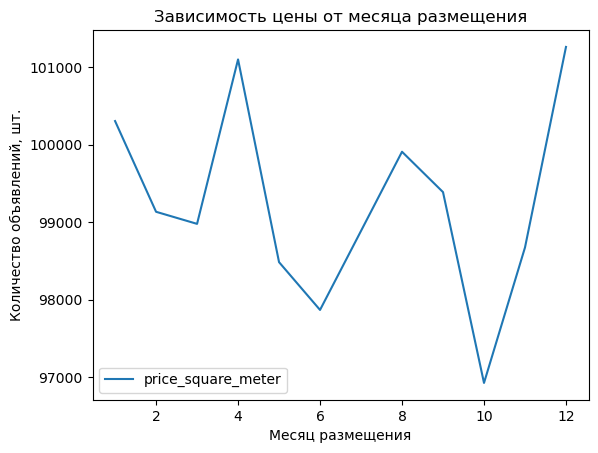

In [45]:
# Цена 1 квадратного метра в зависиомти от месяца размещения

data_pivot = data.pivot_table(index='first_day_month', values='price_square_meter').reset_index()
data_pivot.plot(
   x='first_day_month',
   y='price_square_meter',
   title='Зависимость цены от месяца размещения',
   xlabel='Месяц размещения',
   ylabel='Количество объявлений, шт.',
   rot=0
)
data['first_day_month'].corr(data['price_square_meter'])

Значение коэффициент корреляции Пирсона в зависиомти Цена 1 квадратного метра от от месяца размещения близко к нулю, значит - линейная связь слабая (можно считать, **что месяц размещения не влияет на стоимость одного метра**).

0.014386297504491937

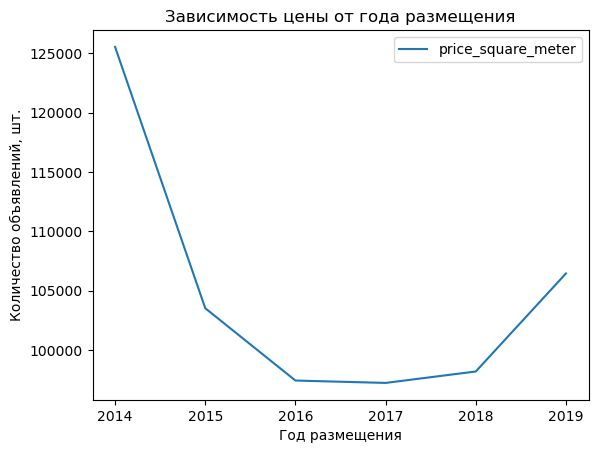

In [46]:
# Цена 1 квадратного метра в зависиомти от года размещения

data_pivot = data.pivot_table(index='first_day_year', values='price_square_meter').reset_index()
data_pivot.plot(
   x='first_day_year',
   y='price_square_meter',
   title='Зависимость цены от года размещения',
   xlabel='Год размещения',
   ylabel='Количество объявлений, шт.',
   rot=0
)
data['first_day_year'].corr(data['price_square_meter'])

Значение коэффициент корреляции Пирсона в зависиомти Цена 1 квадратного метра от от года размещения близко к нулю, значит - линейная связь слабая (можно считать, что **год размещения не влияет на стоимость одного метра**).

### 4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [47]:
# Найдем 10 населённых пунктов с наибольшим числом объявлений. 

top_locality = data['locality_name'].value_counts().sort_values(ascending=False).head(10)
display(top_locality)

Санкт-Петербург      14071
посёлок Мурино         430
посёлок Шушары         393
Всеволожск             357
Пушкин                 337
Колпино                322
Гатчина                290
посёлок Парголово      288
деревня Кудрово        226
Петергоф               190
Name: locality_name, dtype: int64

In [48]:
# Найдем значения стоимости квадратного метра для 10 населённых пунктах с наибольшим числом объявлений.

data_top = (data
    .query('locality_name in @top_locality.index')
    .pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')
    .sort_values('price_square_meter')      
)

# Выведем на экран значения в порядке возростания 

display(data_top.sort_values(by='price_square_meter', ascending=False).round(2)) 

,price_square_meter
locality_name,
Санкт-Петербург,113901.98
Пушкин,103291.30
деревня Кудрово,92248.48
посёлок Парголово,90756.00
посёлок Мурино,85366.55
Петергоф,83754.20
посёлок Шушары,78535.19
Колпино,75226.30
Всеволожск,69029.15


Как видим минимальная средняя стоимость квадратного метра в `Гатчине` (68 635.62) и максимальная средняя стоимость в `Санкт-Петербурге` (113 901.98).

### 4.5 Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Узнаем, как стоимость объектов зависит от расстояния до центра города.

,price_square_meter
cityCenters_nearest_km,
0.0,250756.19
1.0,170546.01
2.0,160463.71
3.0,119946.46
4.0,129295.56
5.0,137679.31
6.0,148560.98
7.0,156145.54
8.0,125589.55


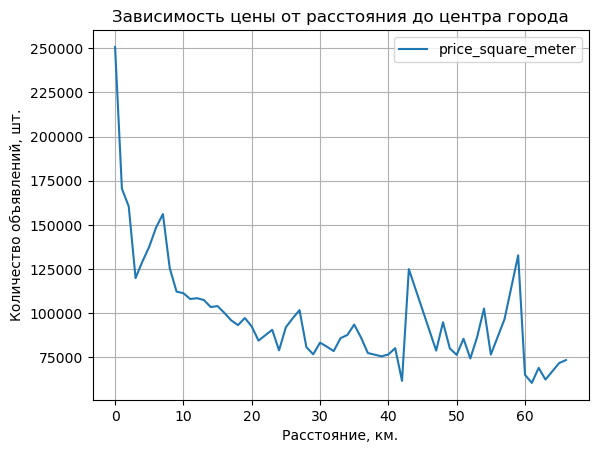

In [49]:
# сделаем сводную таблицу (удалённость в км от центра Питера, и средняя цена 1 кв.м. на этом км)

data_pivot = data.pivot_table(index='cityCenters_nearest_km', values='price_square_meter', aggfunc='mean').round(2)
display(data_pivot.head(10))

# построим линейную диграмму для визуализации динамики цены относительно удалённости

data_pivot.plot(grid=True,
                title='Зависимость цены от расстояния до центра города', 
                xlabel='Расстояние, км.',
                ylabel='Количество объявлений, шт.',
               );

Как видим из графика, средняя **стоимость 1 квадратного метра выше, чем ближе к центру находиться недвижимость**.  

**Вывод по разделу:**

Посторили гистограммы для следующих параметров: 
- общая площадь;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме.

Данные выглядят адекватно, но есть выбивающееся значения, такие как: 
- максимальная площадь квартиры 900 м², 
- минимальная стоимость квартиры 12 190 рублей,
- максимальная количество комнат равное 19,
- минимальное количество дней размещения объявления равное -1  и выбросы районе 45 и 60 дней. 

Нашли положительную линейную связь цены 1 квадратного метра с: 
- общей площадью,
- жилой площадью,
- площади кухни,
- этажа.

Выяснили что на стоиоость 1 квадратного метра не влияют: 
- количества комнат,
- день размещения,
- месяц размещения,
- год размещения.

Средняя стоимость квадратного метра:
- Минимальная в Гатчине (68 635.62),
- максимальная в Санкт-Петербурге (113 901.98).

Средняя стоимость 1 квадратного метра выше, чем ближе к центру находиться недвижимость.

## 5 Общий вывод.

- **Провели предобработку данных:** 
1. Преобразовали тип данных, 
2. Устранили пропуски и неявные дубликаты.  

Качество исходных данных - удовлетворительное, явных дубликатов не обноружено. Но рекомендуется повысить качество данных, таких как: высота потолков, наличие статуса - аппартоенты, коллличество балконов, и т.д. 

- **Далее провели разведочный анализ данных - выяснили интересные особенности и зависимости, которые существуют на рынке недвижимости:**

1. В каждой квартире в базе содержится два типа данных: добавленные пользователем (площадь квартиры, её этаж и количество балконов) и картографические (расстояния до центра города, аэропорта и ближайшего парка).


2. Чем больше общая площадь, тем дороже квадратный метр. *


3. Чем больше жилая площадь, тем дороже квадратный метр. *


4. Чем больше площадь кухни, тем дороже квадратный метр. *


5. Количества комнат не влияет на стоимость одного метра.


6. День, месяц и год размещения не влияют на стоимость одного квадратного метра.


7. Квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.


8. Стоимость объектов зависит от расстояния до центра города (чем ближе к центру, тем дороже).


9. Исходя из графика по годам виден спад цены до 2018 года, но далее стоимость 1 одного квадратного метра повышается.

(* *связь слабая*)